In [1]:
!pip install opencv-python

In [2]:
import cv2

In [3]:
!pip install easygui

In [4]:
import easygui

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import imageio

In [8]:
import sys

In [9]:
import matplotlib.pyplot as plt

In [10]:
import os

In [11]:
import tkinter as tk

In [12]:
from tkinter import filedialog

In [13]:
from tkinter import *

In [14]:
from PIL import ImageTk, Image

In [18]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [19]:
originalImage = cv2.imread("leaf.JPG")

In [21]:
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)

In [22]:
if originalImage is None:
    print("Can not find any image. Choose appropriate file")
    sys.exit()

In [23]:
ReSized1 = cv2.resize(originalImage, (960, 540))

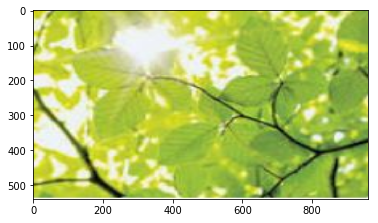

In [24]:
plt.imshow(ReSized1, cmap='gray')

In [25]:
grayScaleImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

In [26]:
ReSized2 = cv2.resize(grayScaleImage, (960, 540))

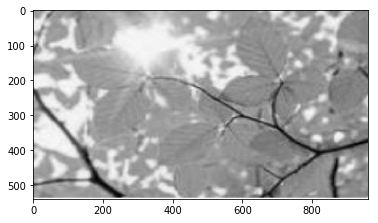

In [27]:
plt.imshow(ReSized2, cmap='gray')

In [28]:
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)

In [31]:
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))

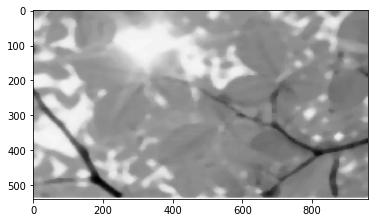

In [32]:
plt.imshow(ReSized3, cmap='gray')

In [33]:
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 9, 9)

In [34]:
ReSized4 = cv2.resize(getEdge, (960, 540))

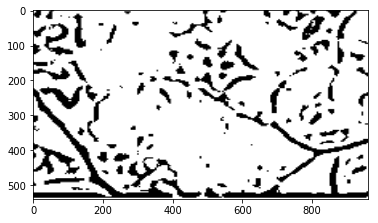

In [36]:
plt.imshow(ReSized4, cmap='gray')

In [37]:
colorImage = cv2.bilateralFilter(originalImage, 9, 300, 300)

In [38]:
ReSized5 = cv2.resize(colorImage, (960, 540))

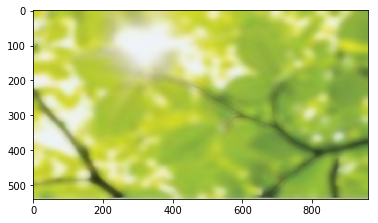

In [39]:
plt.imshow(ReSized5, cmap='gray')

In [40]:
cartoonImage = cv2.bitwise_and(colorImage, colorImage,
                              mask = getEdge)

In [41]:
ReSized6 = cv2.resize(cartoonImage, (960, 540))

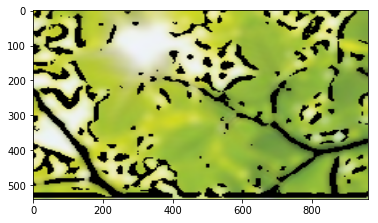

In [42]:
plt.imshow(ReSized6, cmap = 'gray')

In [43]:
images = [ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

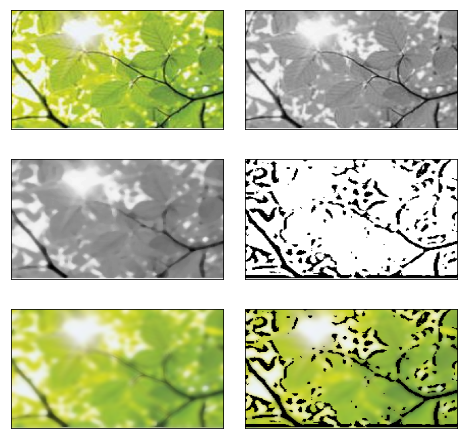

In [45]:
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')